In [1]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_LDW_X_df, get_y_df, data_prep
from model_arch import build_LDW_model
from hyperparameters import create_callback, EPOCHS, LEARNING_RATE, BATCH_SIZE
from predictions import generate_predictions, generate_csv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

2023-10-01 22:29:18.811141: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 22:29:18.845822: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 22:29:18.846519: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-10-01 22:29:19.621994: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


importing Jupyter notebook from dataloader.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from model_arch.ipynb
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.12.0
Tensorflow version: 2.12.0
importing Jupyter notebook from predictions.ipynb


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [3]:
data_filepath = "../../../data/csv/plant_data.csv"
checkpoint_filepath = "../../../model_weights/regression/LDW"

In [4]:
callback = create_callback(
    checkpoint_filepath
)

In [5]:
df = pd.read_csv(data_filepath)
df['LDW_g'].mean()

3.263849287169043

In [6]:
X = get_LDW_X_df(data_filepath)
y = get_y_df(data_filepath, "LDW_g")
#X.tail()
X_train, X_test, y_train, y_test = data_prep(X, y)
X.tail()

,plant_area,plant_convex_hull_area,plant_solidity,plant_perimeter,plant_width,plant_height,plant_longest_path,plant_convex_hull_vertices,plant_ellipse_major_axis,plant_ellipse_minor_axis,height_cm
486,19084,22974.0,0.830678,767.938160,193,167,1367,33,190.580887,137.733093,13.0
487,18373,21556.5,0.852318,661.612260,164,189,1317,29,176.040924,141.141724,14.8
488,23374,26050.0,0.897274,683.754395,186,194,1427,31,191.379974,164.496170,16.9
489,23457,25678.5,0.913488,671.754395,198,179,1364,31,194.815384,159.870819,16.6
490,18533,22886.5,0.809779,821.595015,189,168,1376,22,193.579941,133.306320,14.7


In [7]:
model = build_LDW_model()
print('Input shape:', X_train[0].shape)

Input shape: (11,)


2023-10-01 22:29:21.093428: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-01 22:29:21.128137: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [9]:
history = model.fit (
    X_train, y_train,
    epochs = EPOCHS,
    validation_split = 0.2,
    callbacks = [callback]   
)

Epoch 1/375
11/11 [==============================] - 1s 13ms/step - loss: 15.9070 - val_loss: 16.9375
Epoch 2/375
11/11 [==============================] - 0s 3ms/step - loss: 11.7565 - val_loss: 14.1177
Epoch 3/375
11/11 [==============================] - 0s 3ms/step - loss: 10.8171 - val_loss: 12.5230
Epoch 4/375
11/11 [==============================] - 0s 3ms/step - loss: 10.2818 - val_loss: 11.6229
Epoch 5/375
11/11 [==============================] - 0s 3ms/step - loss: 9.5388 - val_loss: 10.4818
Epoch 6/375
11/11 [==============================] - 0s 3ms/step - loss: 8.7049 - val_loss: 9.1234
Epoch 7/375
11/11 [==============================] - 0s 3ms/step - loss: 7.9631 - val_loss: 8.0645
Epoch 8/375
11/11 [==============================] - 0s 3ms/step - loss: 7.2431 - val_loss: 7.2428
Epoch 9/375
11/11 [==============================] - 0s 3ms/step - loss: 6.6535 - val_loss: 6.4174
Epoch 10/375
11/11 [==============================] - 0s 5ms/step - loss: 6.0681 - val_loss: 5.5249

11/11 [==============================] - 0s 3ms/step - loss: 4.3730 - val_loss: 3.4695
Epoch 14/375
11/11 [==============================] - 0s 4ms/step - loss: 4.0516 - val_loss: 3.1146
Epoch 15/375
11/11 [==============================] - 0s 4ms/step - loss: 3.5917 - val_loss: 2.4697
Epoch 16/375
11/11 [==============================] - 0s 3ms/step - loss: 3.1604 - val_loss: 2.0992
Epoch 17/375
11/11 [==============================] - 0s 3ms/step - loss: 2.4663 - val_loss: 1.8961
Epoch 18/375
11/11 [==============================] - 0s 3ms/step - loss: 2.4107 - val_loss: 1.7999
Epoch 19/375
11/11 [==============================] - 0s 3ms/step - loss: 2.0423 - val_loss: 1.2503
Epoch 20/375
11/11 [==============================] - 0s 3ms/step - loss: 1.8040 - val_loss: 1.4849
Epoch 21/375
11/11 [==============================] - 0s 2ms/step - loss: 1.7047 - val_loss: 1.4278
Epoch 22/375
11/11 [==============================] - 0s 3ms/step - loss: 1.7491 - val_loss: 1.0156
Epoch 23/375


In [10]:
model.save(checkpoint_filepath)

2023-10-01 22:29:34.533385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-10-01 22:29:34.547857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-10-01 22:29:34.778277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-10-01 22:29:34

INFO:tensorflow:Assets written to: ../../../model_weights/regression/LDW/assets


INFO:tensorflow:Assets written to: ../../../model_weights/regression/LDW/assets


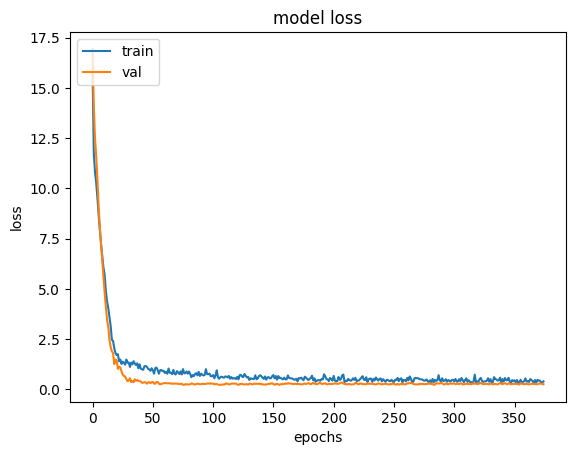

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1247


0.12473341822624207

In [13]:
figures_filepath = "../../../figures/LDW_error_csv"
generate_csv(model, X_test, y_test, "LDW_predictions", "LDW_actual", figures_filepath)

2/2 [==============================] - 0s 2ms/step
